## Generating Images using Large Models on Yandex Cloud

This script is used to generate images using models such as Kandinsky 3 and Flux.

Please copy `jobs.json` file after first run of the generator to the current directory.

In [2]:
%pip install diffusers accelerate transformers sentencepiece

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.2 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import json

with open('jobs.json',encoding='utf-8') as f:
    jobs = json.load(f)

/home/jupyter/.local/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2024-11-06 18:25:15.177084: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-06 18:25:16.538776: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://git

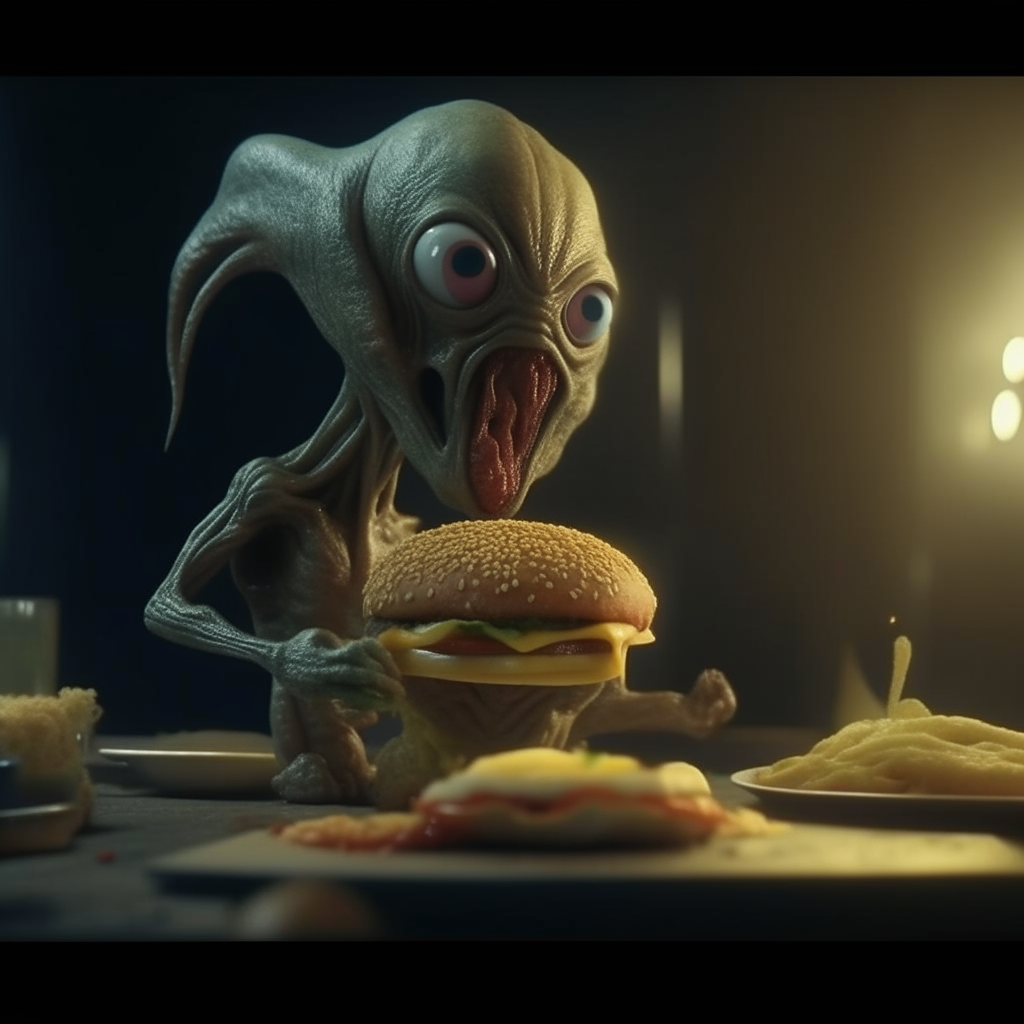

In [2]:
from diffusers import Kandinsky3Pipeline
import torch

pipeline = Kandinsky3Pipeline.from_pretrained("kandinsky-community/kandinsky-3", variant="fp16", torch_dtype=torch.float16)
pipeline.enable_model_cpu_offload()

prompt = "A alien cheeseburger creature eating itself, claymation, cinematic, moody lighting"
image = pipeline(prompt).images[0]
image

In [4]:
import os

k3 = [ (x['prompt'],x['fname']) for x in jobs if x['model']=='k3' ]

for p,fn in k3:
    print(f"Generating {p}")
    fn = fn.replace('\\','/')
    d = fn[:fn.rfind('/')]
    f = fn[fn.rfind('/')+1:]
    os.makedirs(d,exist_ok=True)
    img = pipeline(p).images[0]
    img.save(fn)

Generating portrait photograph of a beautiful fair-haired woman on the city street, looking into the camera 18mm fisheye lens


100%|██████████| 25/25 [00:30<00:00,  1.21s/it]


Generating portrait photograph of a beautiful fair-haired woman on the city street, looking into the camera 50mm portrait lens


100%|██████████| 25/25 [00:28<00:00,  1.15s/it]


Generating portrait photograph of a beautiful fair-haired woman on the city street, looking into the camera 300mm telephoto lens


100%|██████████| 25/25 [00:28<00:00,  1.13s/it]


Generating portrait photograph of a young girl in the garden, Canon EOS-5D, 50mm portrait lens, nice bokeh


100%|██████████| 25/25 [00:27<00:00,  1.10s/it]


Generating portrait photograph of a young girl in the garden, Canon EOS-5D, 50mm portrait lens, sharp focus


100%|██████████| 25/25 [00:27<00:00,  1.08s/it]


Generating portrait photograph of a young girl in the garden, Canon EOS-5D, 50mm portrait lens, soft focus


100%|██████████| 25/25 [00:27<00:00,  1.09s/it]


Generating still life oil painting of an apple, place the subject slightly to the left


100%|██████████| 25/25 [00:27<00:00,  1.08s/it]


Generating still life oil painting of an apple, symmetrical composition


100%|██████████| 25/25 [00:27<00:00,  1.09s/it]


Generating a statue of a magestic cat inside the museum, translucent material


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


Generating a statue of a magestic cat inside the museum, rough stone material


100%|██████████| 25/25 [00:27<00:00,  1.08s/it]


Generating a statue of a magestic cat inside the museum, wood material


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


Generating portrait painting of a young woman in a luxurious red dress, in baroque style, oil on canvas


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


Generating portrait painting of a young woman in a luxurious red dress, in abstract style, oil on canvas


100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


Generating portrait painting of a young woman in a luxurious red dress, in modern style, oil on canvas


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


Generating portrait painting of a young woman in a luxurious red dress, in impressionism style, oil on canvas


100%|██████████| 25/25 [00:27<00:00,  1.08s/it]


Generating portrait painting of a young woman in a luxurious red dress, in surrealism style, oil on canvas


100%|██████████| 25/25 [00:26<00:00,  1.06s/it]


Generating portrait painting of a young woman in a luxurious red dress, in cubism style, oil on canvas


100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


Generating watercolor painting of the eiffel tower in France


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


Generating gouache painting of the eiffel tower in France


100%|██████████| 25/25 [00:27<00:00,  1.09s/it]


Generating oil painting of the eiffel tower in France


100%|██████████| 25/25 [00:27<00:00,  1.08s/it]


Generating oil painting of a student in class, Ilya Repin


100%|██████████| 25/25 [00:27<00:00,  1.09s/it]


Generating oil painting of a student in class, Vincent Van Gogh


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


Generating oil painting of a student in class, Kazimir Malevich


100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


Generating oil painting of a student in class, Banksy


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


In [3]:
import os
os.environ['HF_HOME'] = '/home/jupyter/work/resources/model_cache'
os.makedirs('/home/jupyter/work/resources/model_cache',exist_ok=True)

/home/jupyter/.local/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2024-11-06 16:57:06.929000: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-06 16:57:11.343343: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://git

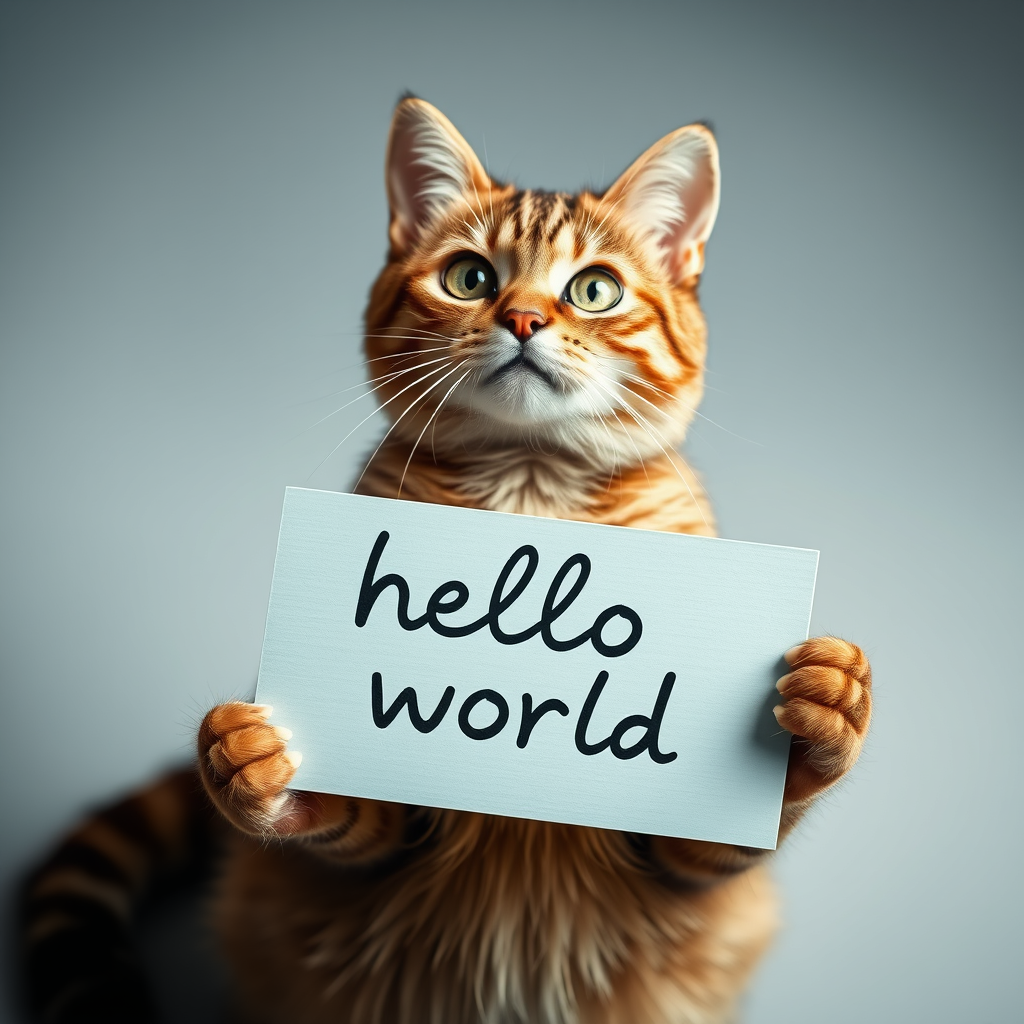

In [4]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power

prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    guidance_scale=0.0,
    num_inference_steps=4,
    max_sequence_length=256,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]
image


In [13]:
ff = [ (x['prompt'],x['fname']) for x in jobs if x['model']=='flux' ]

for p,fn in ff:
    print(f"Generating {p}")
    fn = fn.replace('\\','/')
    d = fn[:fn.rfind('/')]
    f = fn[fn.rfind('/')+1:]
    os.makedirs(d,exist_ok=True)
    img = pipe(p,guidance_scale=0.0,num_inference_steps=4).images[0]
    img.save(fn)

Generating portrait photograph of a beautiful fair-haired woman on the city street, looking into the camera 18mm fisheye lens


100%|██████████| 4/4 [00:32<00:00,  8.24s/it]


Generating portrait photograph of a beautiful fair-haired woman on the city street, looking into the camera 50mm portrait lens


100%|██████████| 4/4 [00:37<00:00,  9.38s/it]


Generating portrait photograph of a beautiful fair-haired woman on the city street, looking into the camera 300mm telephoto lens


100%|██████████| 4/4 [00:37<00:00,  9.38s/it]


Generating portrait photograph of a young girl in the garden, Canon EOS-5D, 50mm portrait lens, nice bokeh


100%|██████████| 4/4 [00:37<00:00,  9.34s/it]


Generating portrait photograph of a young girl in the garden, Canon EOS-5D, 50mm portrait lens, sharp focus


100%|██████████| 4/4 [00:37<00:00,  9.35s/it]


Generating portrait photograph of a young girl in the garden, Canon EOS-5D, 50mm portrait lens, soft focus


100%|██████████| 4/4 [00:37<00:00,  9.36s/it]


Generating still life oil painting of an apple, place the subject slightly to the left


100%|██████████| 4/4 [00:37<00:00,  9.26s/it]


Generating still life oil painting of an apple, symmetrical composition


100%|██████████| 4/4 [00:37<00:00,  9.25s/it]


Generating a statue of a magestic cat inside the museum, translucent material


100%|██████████| 4/4 [00:36<00:00,  9.23s/it]


Generating a statue of a magestic cat inside the museum, rough stone material


100%|██████████| 4/4 [00:36<00:00,  9.17s/it]


Generating a statue of a magestic cat inside the museum, wood material


100%|██████████| 4/4 [00:36<00:00,  9.18s/it]


Generating portrait painting of a young woman in a luxurious red dress, in baroque style, oil on canvas


100%|██████████| 4/4 [00:37<00:00,  9.27s/it]


Generating portrait painting of a young woman in a luxurious red dress, in abstract style, oil on canvas


100%|██████████| 4/4 [00:37<00:00,  9.29s/it]


Generating portrait painting of a young woman in a luxurious red dress, in modern style, oil on canvas


100%|██████████| 4/4 [00:37<00:00,  9.26s/it]


Generating portrait painting of a young woman in a luxurious red dress, in impressionism style, oil on canvas


100%|██████████| 4/4 [00:36<00:00,  9.24s/it]


Generating portrait painting of a young woman in a luxurious red dress, in surrealism style, oil on canvas


100%|██████████| 4/4 [00:36<00:00,  9.16s/it]


Generating portrait painting of a young woman in a luxurious red dress, in cubism style, oil on canvas


100%|██████████| 4/4 [00:36<00:00,  9.15s/it]


Generating watercolor painting of the eiffel tower in France


100%|██████████| 4/4 [00:36<00:00,  9.09s/it]


Generating gouache painting of the eiffel tower in France


100%|██████████| 4/4 [00:36<00:00,  9.17s/it]


Generating oil painting of the eiffel tower in France


100%|██████████| 4/4 [00:36<00:00,  9.17s/it]


Generating oil painting of a student in class, Ilya Repin


100%|██████████| 4/4 [00:36<00:00,  9.19s/it]


Generating oil painting of a student in class, Vincent Van Gogh


100%|██████████| 4/4 [00:36<00:00,  9.20s/it]


Generating oil painting of a student in class, Kazimir Malevich


100%|██████████| 4/4 [00:36<00:00,  9.20s/it]


Generating oil painting of a student in class, Banksy


100%|██████████| 4/4 [00:36<00:00,  9.21s/it]


In [14]:
import gc

#pipe = None

torch.cuda.empty_cache()
gc.collect()


48